In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
# df = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
# df = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
# df = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
# df = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  8 non-null      object
 1   1         8 non-null      int64 
 2   2         8 non-null      int64 
 3   3         8 non-null      int64 
 4   4         8 non-null      int64 
 5   5         8 non-null      int64 
 6   6         8 non-null      int64 
 7   7         8 non-null      int64 
 8   8         8 non-null      int64 
 9   9         8 non-null      int64 
 10  10        8 non-null      int64 
 11  11        8 non-null      int64 
 12  12        8 non-null      int64 
 13  13        8 non-null      int64 
 14  14        8 non-null      int64 
 15  15        8 non-null      int64 
 16  16        8 non-null      int64 
 17  17        8 non-null      int64 
 18  18        8 non-null      int64 
 19  19        8 non-null      int64 
 20  20        8 non-null      int64 
 21  21        8 non-null

In [ ]:
df

,Question,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,CEO,5,9,5,5,5,10,5,5,7,...,7,10,10,9,9,5,10,5,5,5
1,Leader,5,9,7,5,4,9,10,10,5,...,7,4,8,10,10,10,7,10,4,5
2,Leader,5,5,10,5,8,5,7,4,7,...,9,7,9,9,7,5,5,5,9,9
3,Leader,10,9,7,7,9,5,5,7,5,...,7,9,9,4,5,9,9,10,10,9
4,Leader,10,8,8,9,8,5,7,5,5,...,7,5,4,10,4,7,5,8,9,9
5,Team,8,5,5,7,9,5,8,9,10,...,9,10,4,7,10,9,7,9,4,5
6,Team,9,5,5,10,8,4,5,7,7,...,9,5,7,5,5,5,9,8,7,9
7,Team,5,10,7,4,5,7,9,5,10,...,9,10,9,5,7,5,9,9,10,7


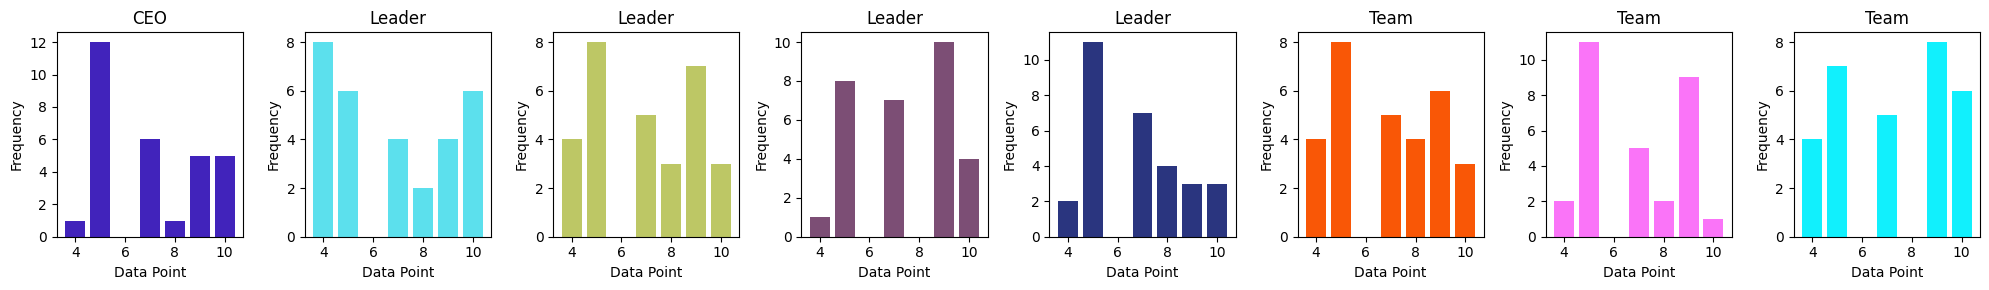

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def random_color():
    return (random.random(), random.random(), random.random())

fig, axes = plt.subplots(nrows=1, ncols=len(df), figsize=(20, 3))

for index, (row, ax) in enumerate(zip(df.iterrows(), axes)):
    row = row[1]

    data = row[1:]


    data_counts = data.value_counts()


    color = random_color()


    ax.bar(data_counts.index, data_counts.values, color=color)
    ax.set_xlabel("Data Point")
    ax.set_ylabel("Frequency")
    ax.set_title(f"{row['Question']}")


plt.tight_layout()
plt.show()

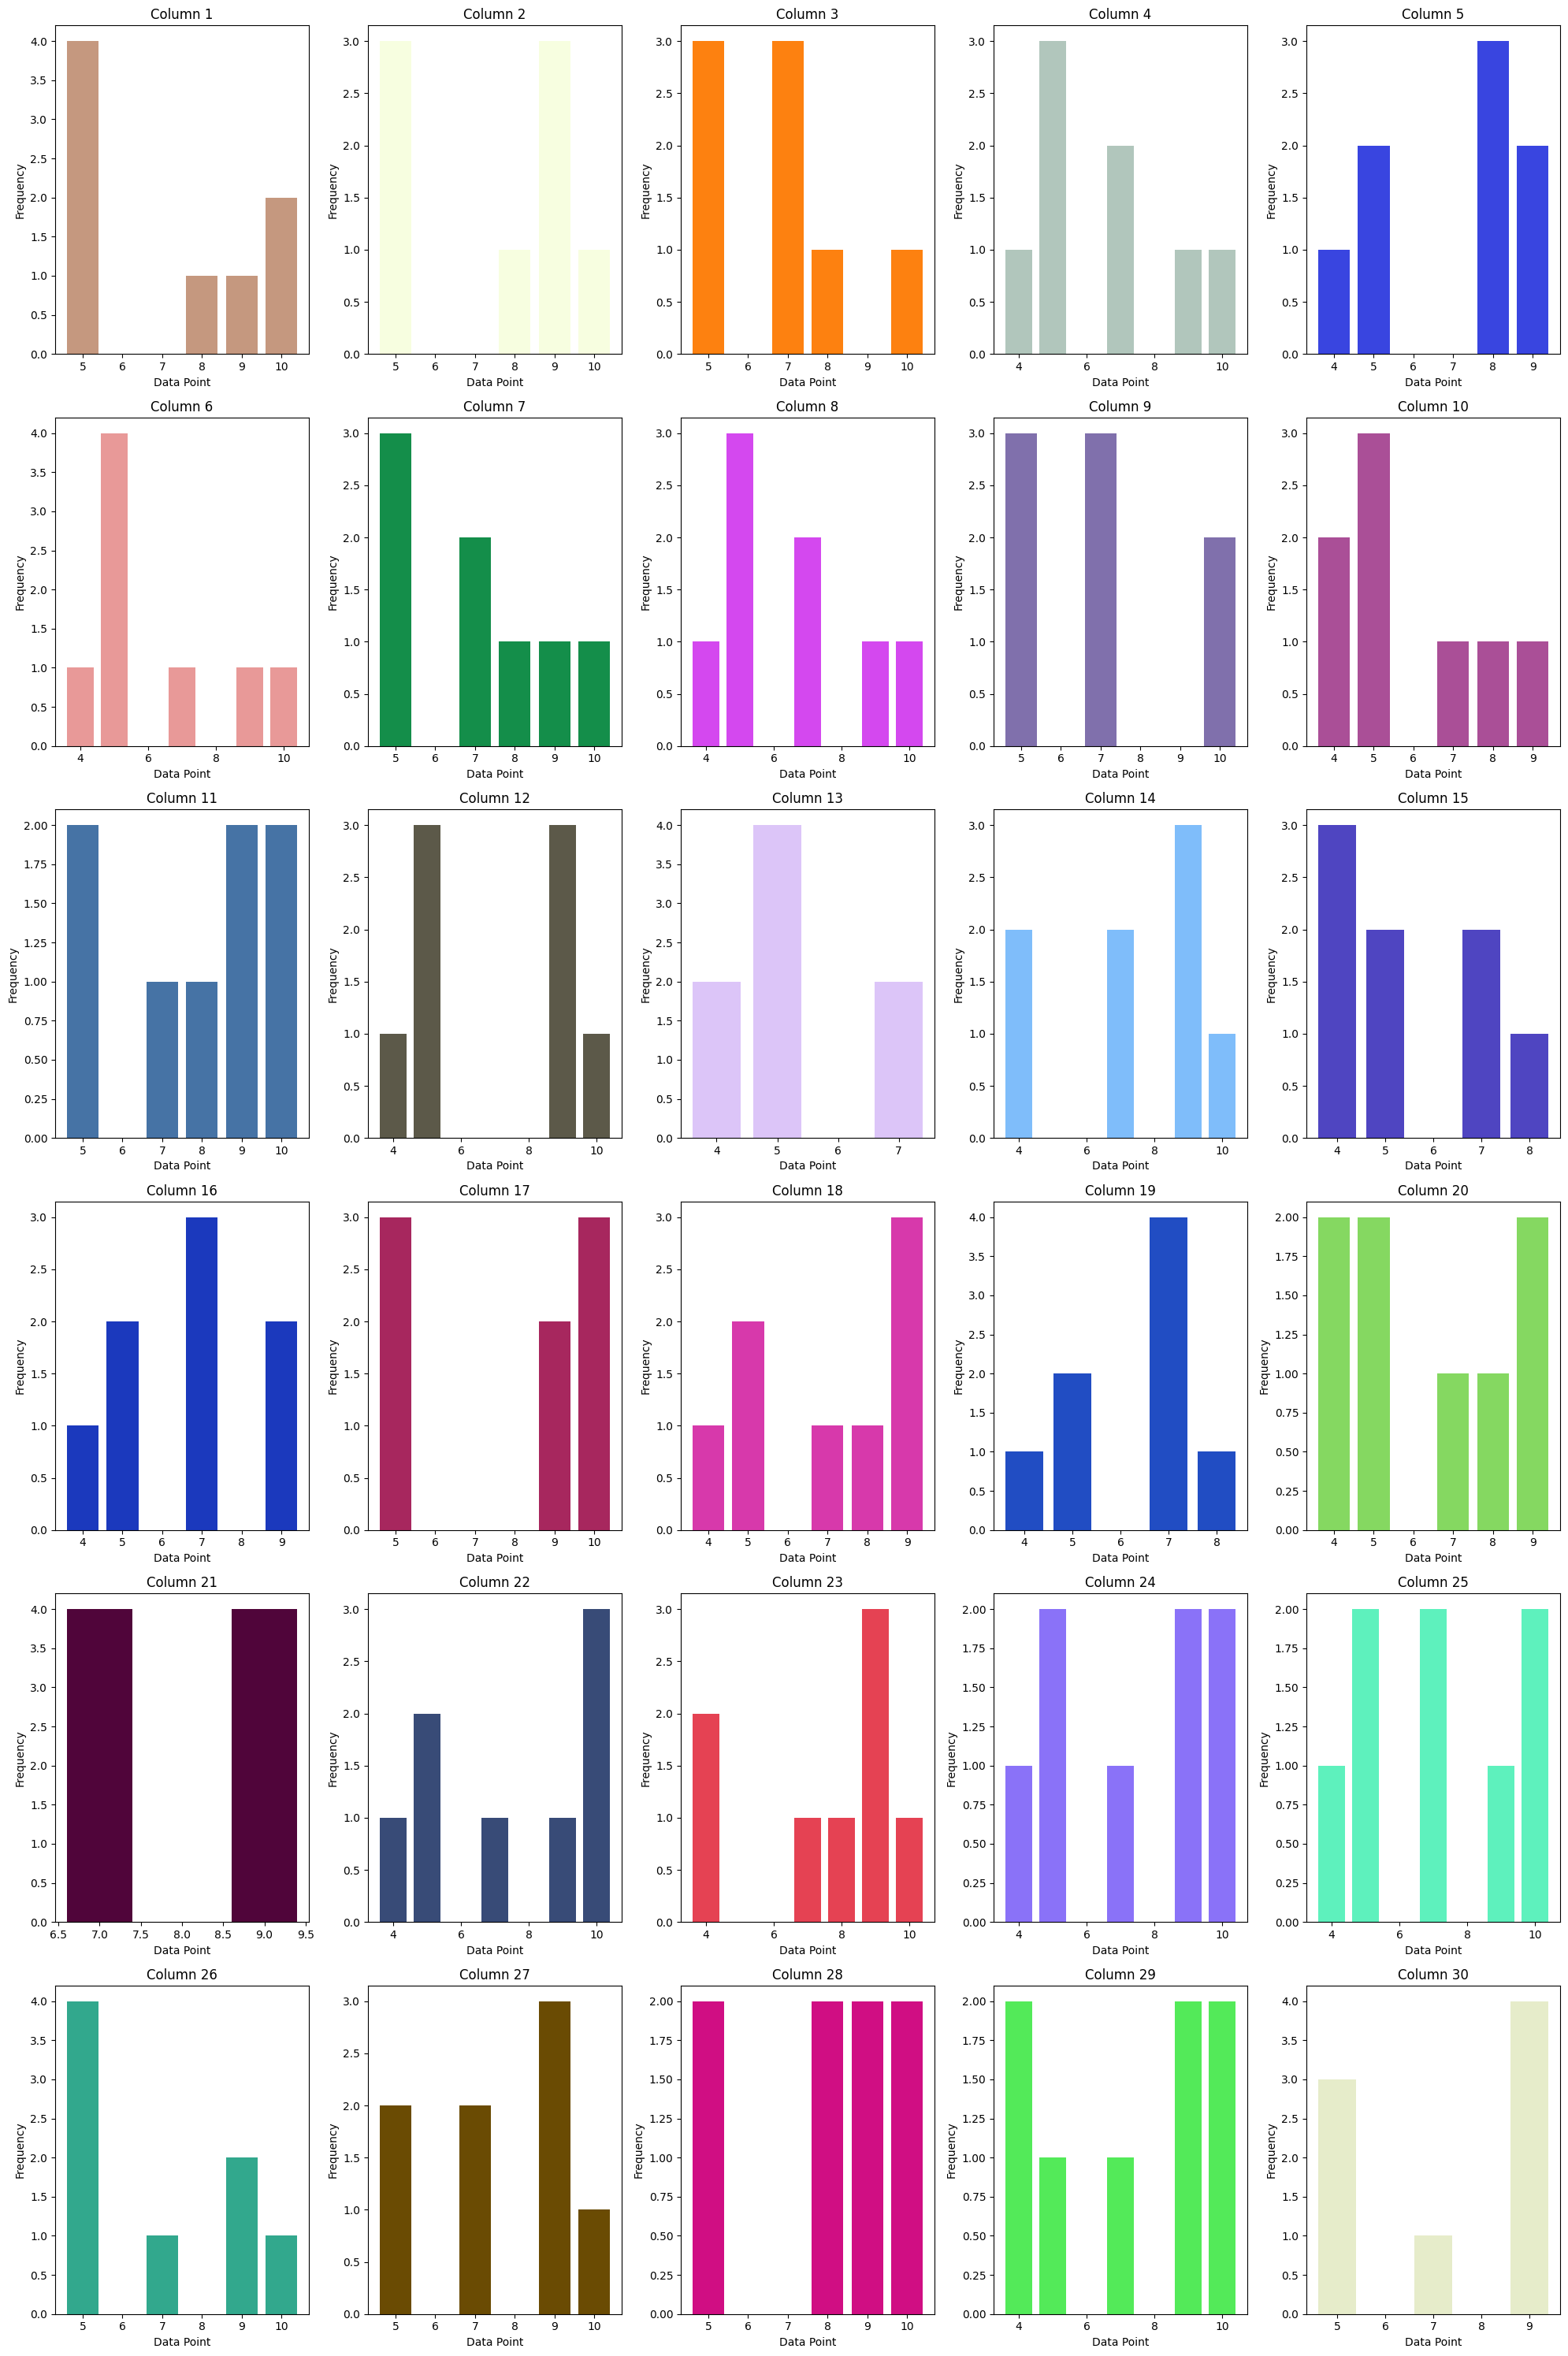

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def random_color():
    return (random.random(), random.random(), random.random())

plots_per_row = 5
total_plots = df.shape[1] - 1
rows = (total_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=(20, 5 * rows))

for index, column in enumerate(df.columns[1:]):
    row = index // plots_per_row
    col = index % plots_per_row


    data_counts = df[column].value_counts()


    color = random_color()


    axes[row, col].bar(data_counts.index, data_counts.values, color=color)
    axes[row, col].set_xlabel("Data Point")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_title(f"Column {column}")


for index in range(total_plots, rows * plots_per_row):
    fig.delaxes(axes.flatten()[index])


plt.tight_layout()
plt.show()

=========================================================================================================

# Average (Mean)

In [ ]:
import pandas as pd

average_values = df.iloc[:, 1:].mean()

print(average_values)

1     7.125
2     7.500
3     6.750
4     6.500
5     7.000
6     6.250
7     7.000
8     6.500
9     7.000
10    5.875
11    7.875
12    7.000
13    5.250
14    7.375
15    5.500
16    6.625
17    7.875
18    7.000
19    6.250
20    6.375
21    8.000
22    7.500
23    7.500
24    7.375
25    7.125
26    6.875
27    7.625
28    8.000
29    7.250
30    7.250
dtype: float64


In [ ]:
import pandas as pd

column_averages = df.iloc[:, 1:].mean()


def find_rows(df, column_averages):
    for column in df.columns[1:]:
        avg = column_averages[column]

        less_than_avg = df[df[column] < avg]
        if not less_than_avg.empty:
            print(f"Values less than average in column {column}:")
            print(less_than_avg[df.columns[0]].tolist())


        greater_than_avg = df[df[column] > avg]
        if not greater_than_avg.empty:
            print(f"Values greater than average in column {column}:")
            print(greater_than_avg[df.columns[0]].tolist())


        print('-' * 40)


find_rows(df, column_averages)

Values less than average in column 1:
['CEO', 'Leader', 'Leader', 'Team']
Values greater than average in column 1:
['Leader', 'Leader', 'Team', 'Team']
----------------------------------------
Values less than average in column 2:
['Leader', 'Team', 'Team']
Values greater than average in column 2:
['CEO', 'Leader', 'Leader', 'Leader', 'Team']
----------------------------------------
Values less than average in column 3:
['CEO', 'Team', 'Team']
Values greater than average in column 3:
['Leader', 'Leader', 'Leader', 'Leader', 'Team']
----------------------------------------
Values less than average in column 4:
['CEO', 'Leader', 'Leader', 'Team']
Values greater than average in column 4:
['Leader', 'Leader', 'Team', 'Team']
----------------------------------------
Values less than average in column 5:
['CEO', 'Leader', 'Team']
Values greater than average in column 5:
['Leader', 'Leader', 'Leader', 'Team', 'Team']
----------------------------------------
Values less than average in column 

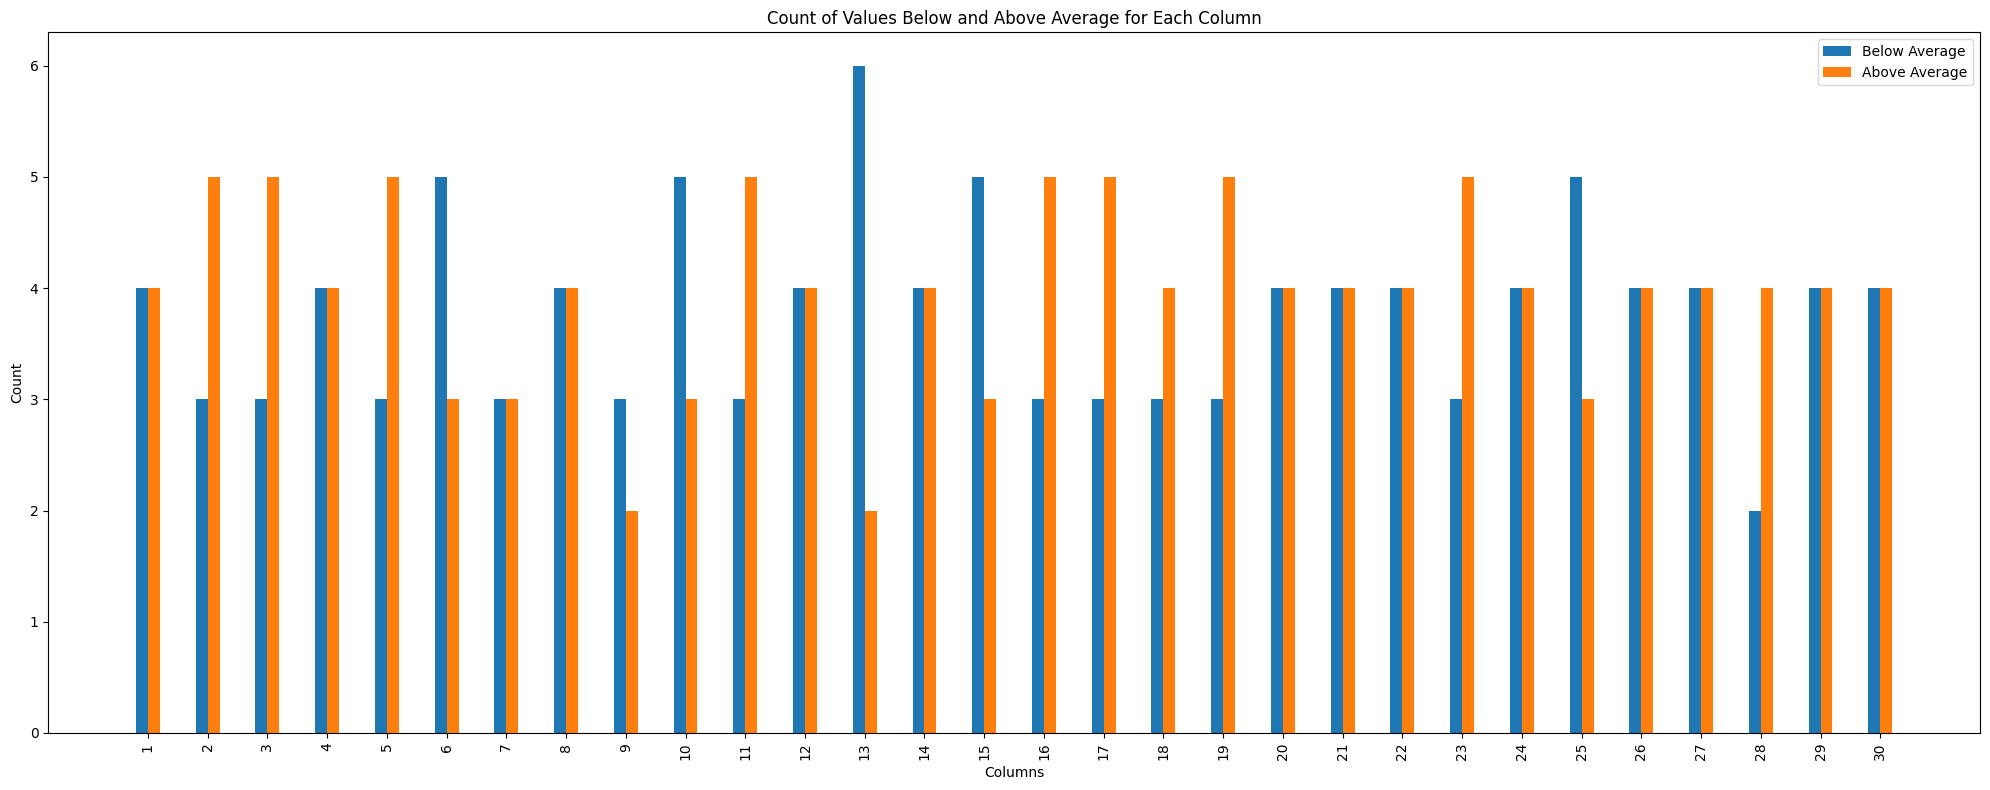

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

column_averages = df.iloc[:, 1:].mean()

below_avg_counts = (df.iloc[:, 1:] < column_averages).sum()
above_avg_counts = (df.iloc[:, 1:] > column_averages).sum()

fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.3
spacing = 1.5
index = [i * spacing for i in range(len(df.columns[1:]))]

bars1 = plt.bar(index, below_avg_counts, bar_width, label='Below Average')
bars2 = plt.bar([i + bar_width for i in index], above_avg_counts, bar_width, label='Above Average')

plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Values Below and Above Average for Each Column')
plt.xticks([i + bar_width / 2 for i in index], df.columns[1:], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
df = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')

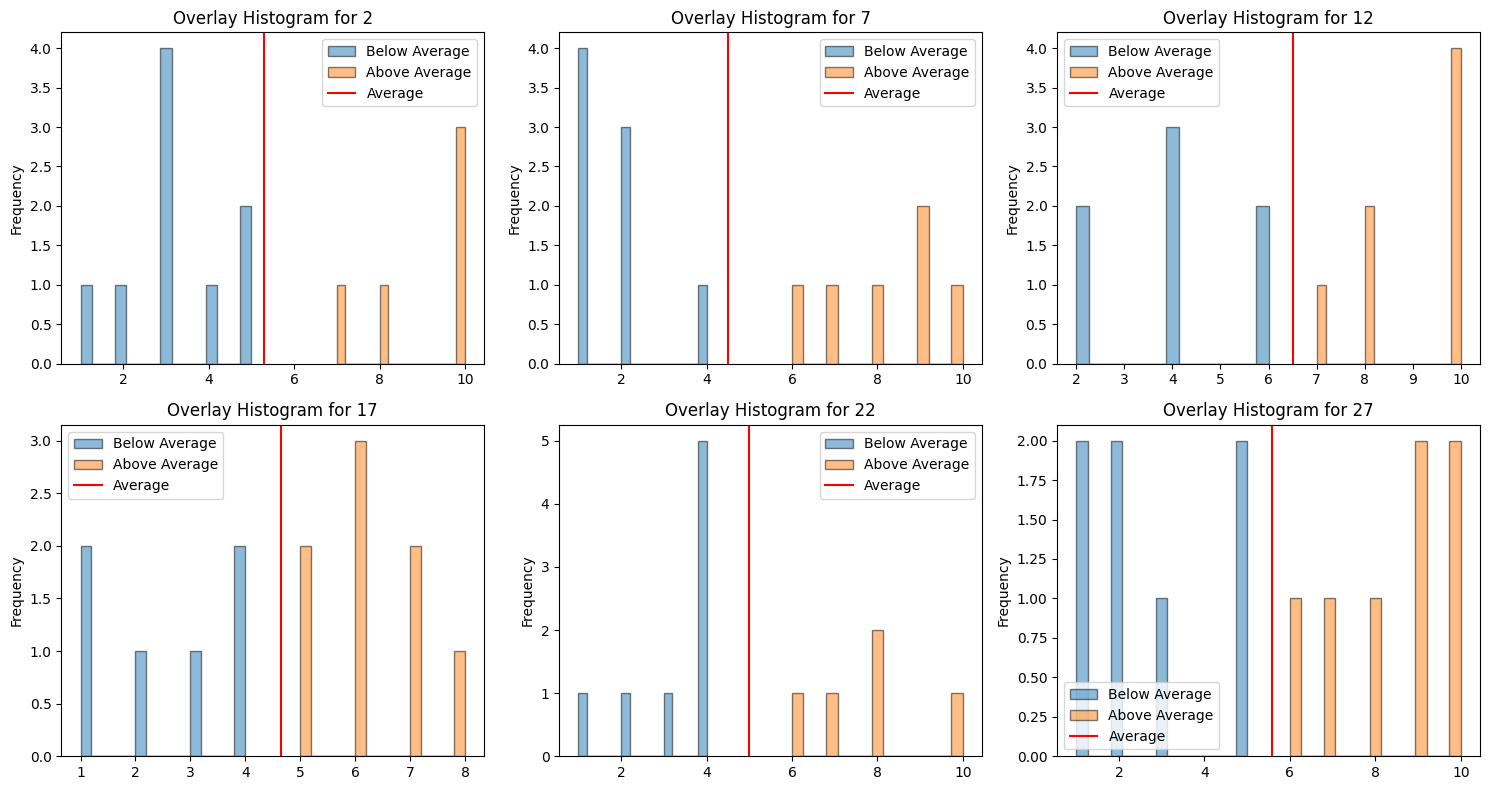

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

columns_to_plot = [2, 7, 12, 17, 22, 27]

# 1. Model The Way = [1, 11, 6, 21, 26, 16]
# 2. Inspire a Vision = [2, 7, 12, 17, 22, 27]
# 3. Challenge the Process = [3, 23, 8, 28, 13, 18]
# 4. Enable to Act = [14, 24, 9, 4, 19, 29]
# 5. Encourage the Heart = [10, 30, 5, 25, 15, 20]

# R&D Manager
# Product Manager
# Quality Manager
# HR Manager
# Technical Manager

column_averages = df.iloc[:, columns_to_plot].mean()

cols_per_row = 3
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

for i, column_idx in enumerate(columns_to_plot):
    row, col = divmod(i, cols_per_row)
    ax = axes[row, col]

    column_name = df.columns[column_idx]
    below_avg = df[df[column_name] < column_averages[column_name]][column_name]
    above_avg = df[df[column_name] > column_averages[column_name]][column_name]

    ax.hist(below_avg, bins=15, alpha=0.5, label='Below Average', histtype='stepfilled', edgecolor='black')
    ax.hist(above_avg, bins=15, alpha=0.5, label='Above Average', histtype='stepfilled', edgecolor='black')
    ax.axvline(column_averages[column_name], color='r', linestyle='-', label='Average')
    ax.set_title(f'Overlay Histogram for {column_name}')
    ax.set_ylabel('Frequency')
    ax.legend()


for i in range(num_plots, num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

=========================================================================================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
df = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')

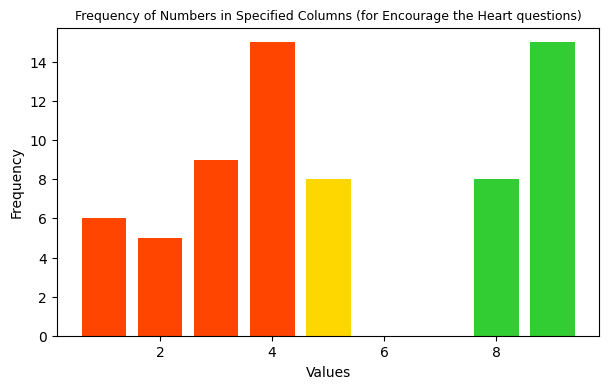

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

columns = [10, 30, 5, 25, 15, 20]

# 1. Model The Way = [1, 11, 6, 21, 26, 16]
# 2. Inspire a Vision = [2, 7, 12, 17, 22, 27]
# 3. Challenge the Process = [3, 23, 8, 28, 13, 18]
# 4. Enable to Act = [14, 24, 9, 4, 19, 29]
# 5. Encourage the Heart = [10, 30, 5, 25, 15, 20]

numbers = df.iloc[:, columns].values.flatten()

frequency = pd.Series(numbers).value_counts().sort_index()

colors = frequency.index.map(lambda x: 'limegreen' if x > 5 else ('orangered' if x < 5 else 'gold'))

plt.figure(figsize=(7, 4))
plt.bar(frequency.index, frequency.values, color=colors)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers in Specified Columns (for Encourage the Heart questions)', fontsize=9)
plt.show()

=========================================================================================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')

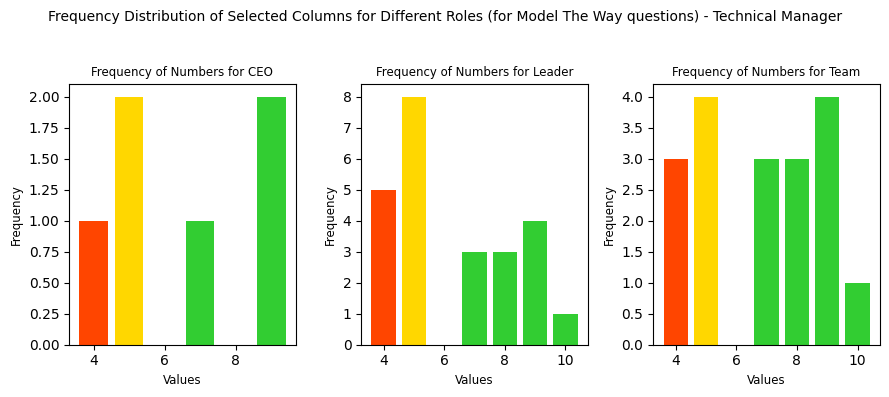

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


columns_of_interest = [10, 30, 5, 25, 15, 20]

# 1. Model The Way = [1, 11, 6, 21, 26, 16]
# 2. Inspire a Vision = [2, 7, 12, 17, 22, 27]
# 3. Challenge the Process = [3, 23, 8, 28, 13, 18]
# 4. Enable to Act = [14, 24, 9, 4, 19, 29]
# 5. Encourage the Heart = [10, 30, 5, 25, 15, 20]


def plot_frequency(ax, row_name, df, columns_of_interest):

    filtered_df = df[df[df.columns[0]] == row_name]


    selected_columns = [df.columns[i] for i in columns_of_interest]
    data = filtered_df[selected_columns]


    flattened_data = data.values.flatten()


    counts = pd.Series(flattened_data).value_counts().sort_index()


    colors = ['limegreen' if x > 5 else 'orangered' if x < 5 else 'gold' for x in counts.index]
    bars = ax.bar(counts.index, counts.values, color=colors)


    ax.set_xlabel('Values', fontsize=8.5)
    ax.set_ylabel('Frequency', fontsize=8.5)
    ax.set_title(f'Frequency of Numbers for {row_name}', fontsize=8.5)


fig, axs = plt.subplots(1, 3, figsize=(9, 4))


rows_of_interest = ['CEO', 'Leader', 'Team']
for ax, row in zip(axs, rows_of_interest):
    plot_frequency(ax, row, df, columns_of_interest)


fig.suptitle('Frequency Distribution of Selected Columns for Different Roles (for Model The Way questions) - Technical Manager', fontsize=10)

# R&D Manager
# Product Manager
# Quality Manager
# HR Manager
# Technical Manager

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

=========================================================================================================

# Standard Deviation (STD)

In [ ]:
import pandas as pd

std_values = df.iloc[:, 1:].std()

print(std_values)

1     2.356602
2     2.138090
3     1.752549
4     2.138090
5     2.000000
6     2.187628
7     1.927248
8     2.138090
9     2.070197
10    1.885092
11    2.031010
12    2.449490
13    1.164965
14    2.326094
15    1.603567
16    1.846812
17    2.416461
18    2.070197
19    1.388730
20    2.133910
21    1.069045
22    2.563480
23    2.329929
24    2.445842
25    2.356602
26    2.167124
27    1.922610
28    2.000000
29    2.604940
30    1.982062
dtype: float64


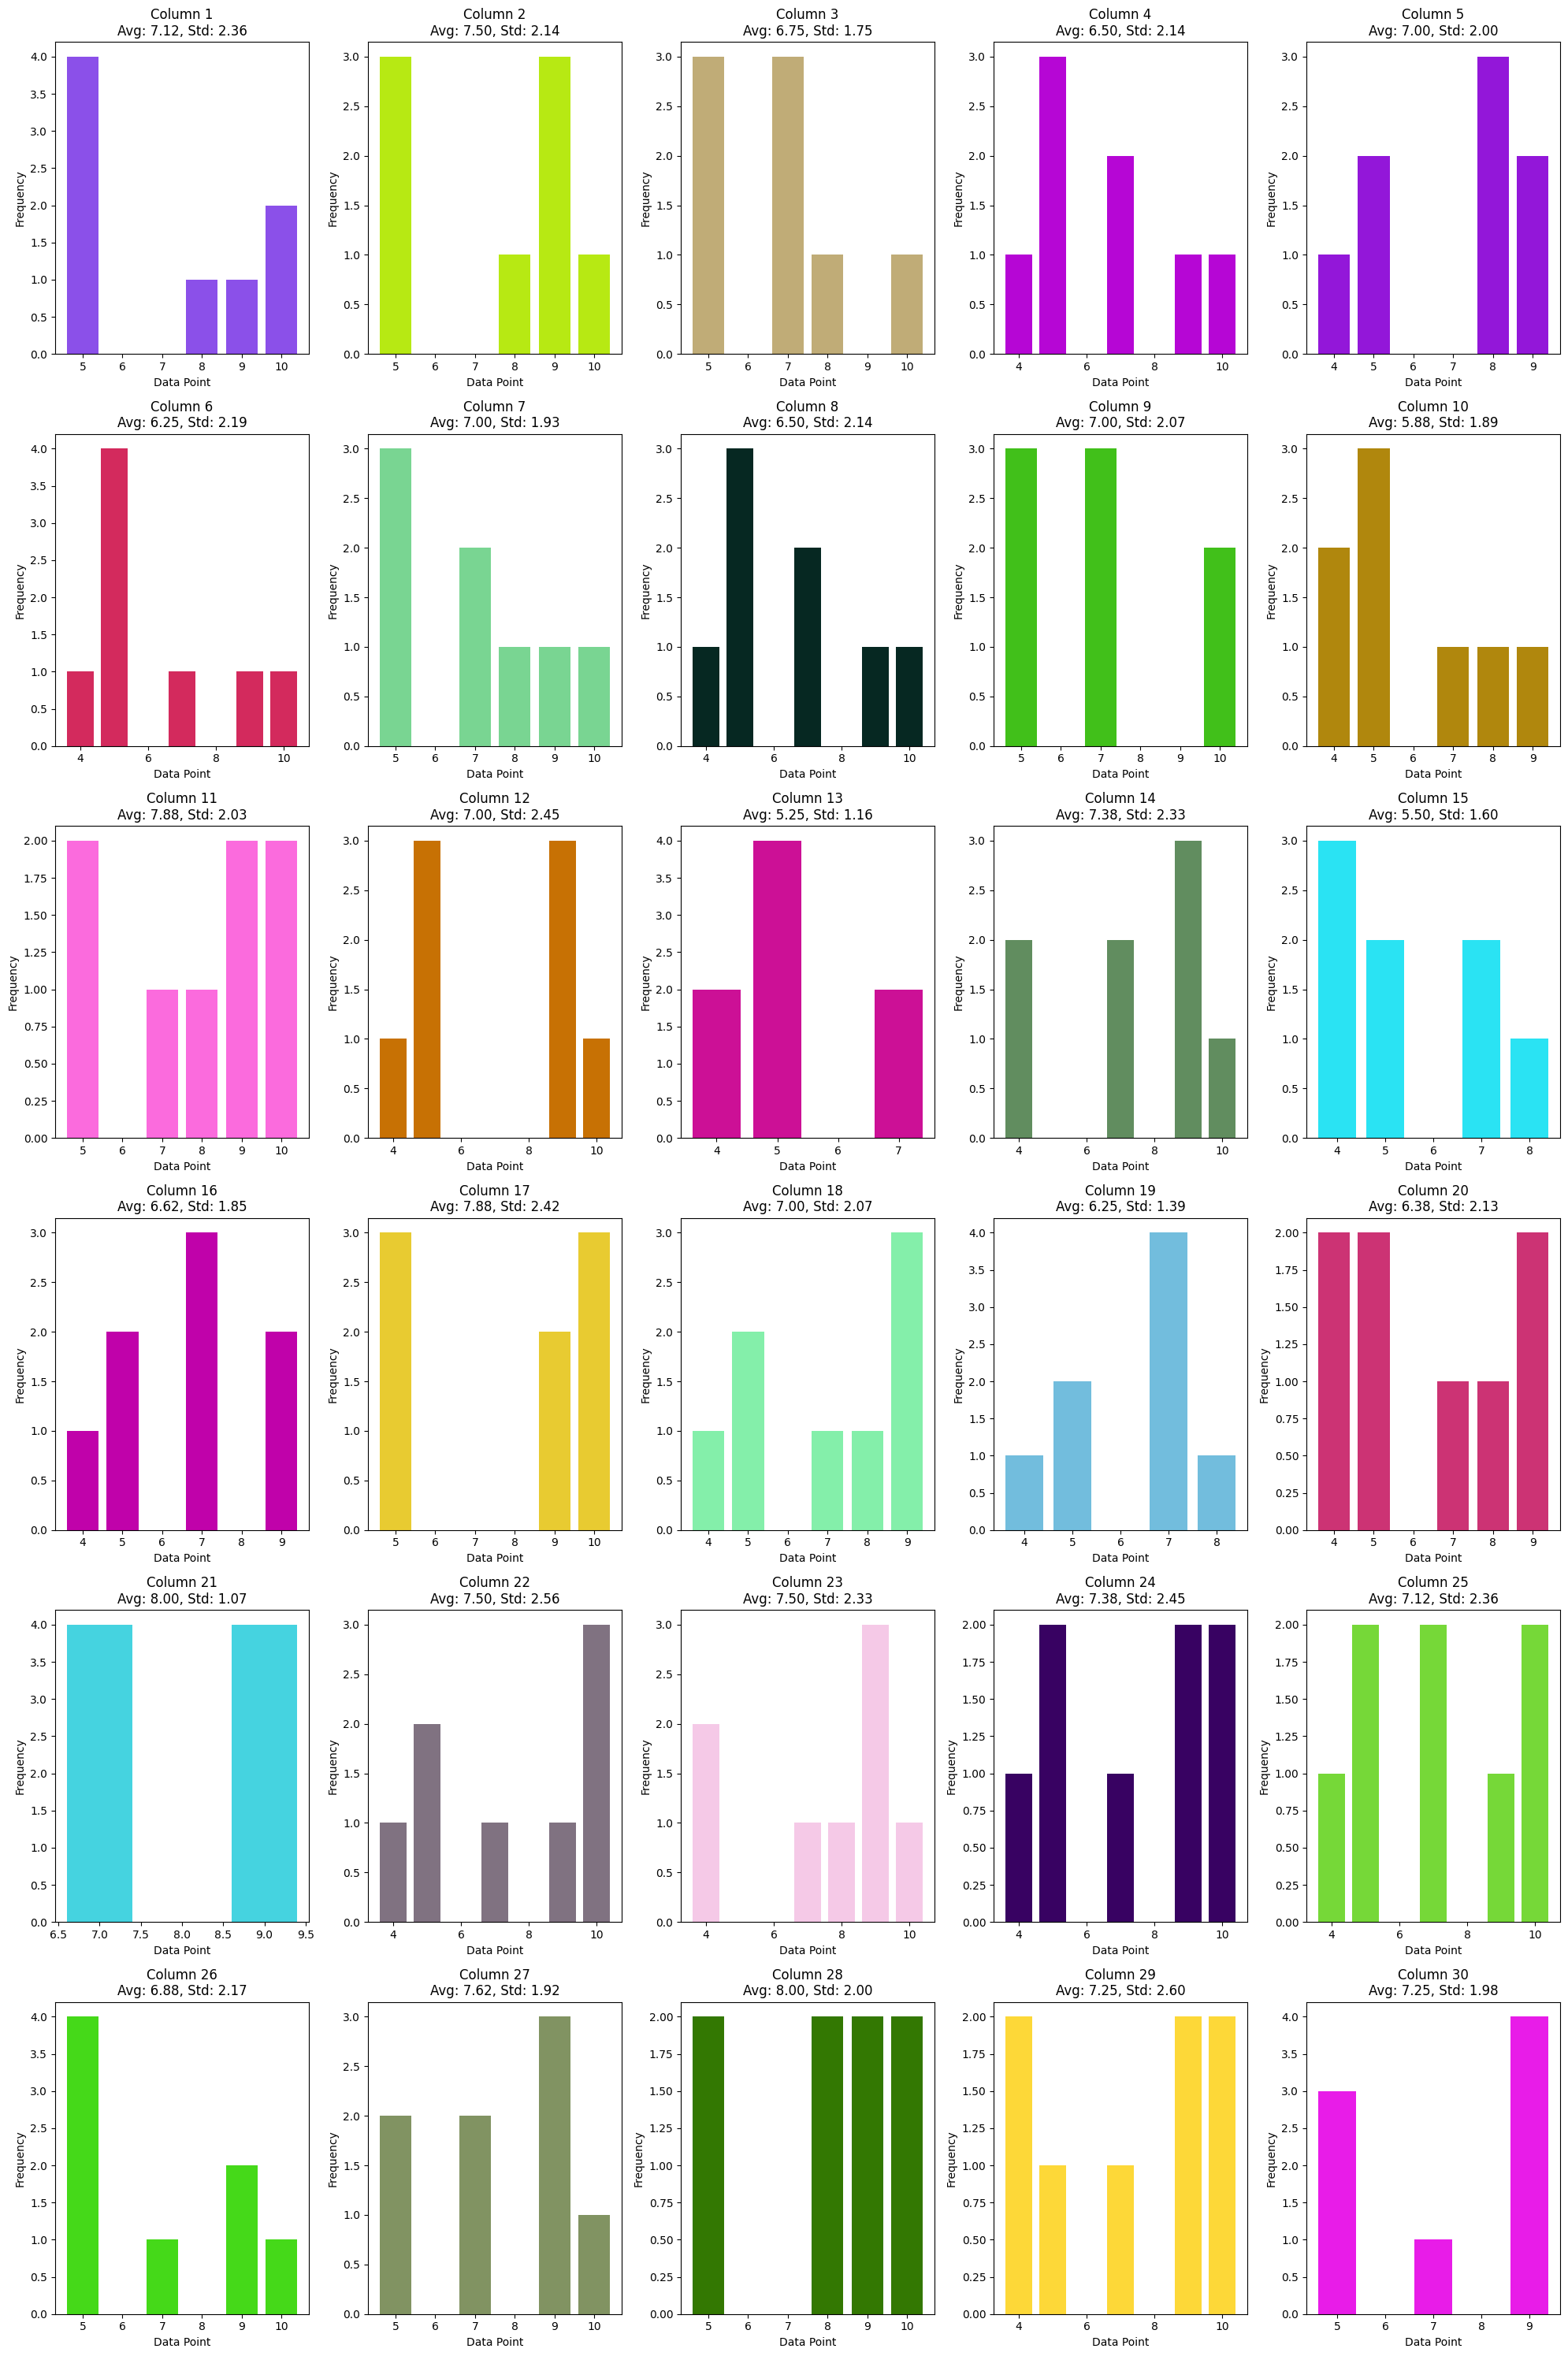

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def random_color():
    return (random.random(), random.random(), random.random())


plots_per_row = 5
total_plots = df.shape[1] - 1
rows = (total_plots + plots_per_row - 1) // plots_per_row


fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=(20, 5 * rows))


for index, column in enumerate(df.columns[1:]):
    row = index // plots_per_row
    col = index % plots_per_row


    avg = df[column].mean()
    std = df[column].std()


    data_counts = df[column].value_counts()


    color = random_color()


    axes[row, col].bar(data_counts.index, data_counts.values, color=color)
    axes[row, col].set_xlabel("Data Point")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_title(f"Column {column}\nAvg: {avg:.2f}, Std: {std:.2f}")


for index in range(total_plots, rows * plots_per_row):
    fig.delaxes(axes.flatten()[index])


plt.tight_layout()
plt.show()

STD measures spread: It tells you how far data points typically deviate from the average (mean).

**STD doesn't directly translate to an "acceptable" range around the mean. It describes the typical spread of data.**


Mean represents the center: It's the average value of the data set.


Outliers can exist in any data set.

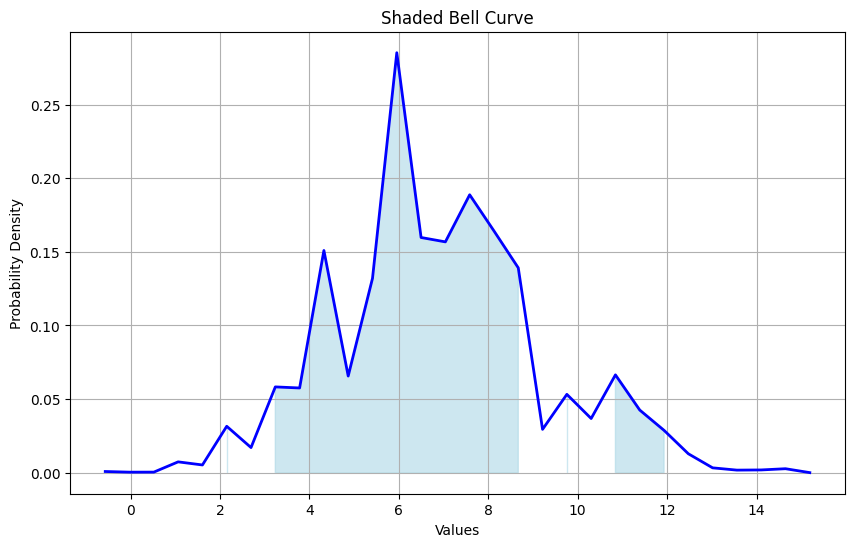

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

average_values = df.iloc[:, 1:].mean()


std_values = df.iloc[:, 1:].std()


x = np.linspace(min(average_values - 3*std_values), max(average_values + 3*std_values), 30)
y = norm.pdf(x, average_values, std_values)


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.fill_between(x, y, where=(x >= average_values - 2*std_values) & (x <= average_values + 2*std_values), color='lightblue', alpha=0.6)
plt.title('Shaded Bell Curve')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

=========================================================================================================

# Employee Net Promoter Score (eNPS)

In [ ]:
import pandas as pd

for column in df.columns[1:]:

    values = df[column].dropna().astype(int)


    promoters_count = values[values.isin([9, 10])].count()
    neutral_count = values[values.isin([7, 8])].count()
    detractors_count = values[values.isin([0, 1, 2, 3, 4, 5, 6])].count()


    print(f"Column: {column}")
    print(f"Promoters: {promoters_count}")
    print(f"Neutrals: {neutral_count}")
    print(f"Detractors: {detractors_count}")


    total_responses = len(values)
    eNPS = ((promoters_count - detractors_count) / total_responses) * 100


    print(f"Employee Net Promoter Score (eNPS): {eNPS:.2f}")
    print("-" * 40)

Column: 1
Promoters: 3
Neutrals: 1
Detractors: 4
Employee Net Promoter Score (eNPS): -12.50
----------------------------------------
Column: 2
Promoters: 4
Neutrals: 1
Detractors: 3
Employee Net Promoter Score (eNPS): 12.50
----------------------------------------
Column: 3
Promoters: 1
Neutrals: 4
Detractors: 3
Employee Net Promoter Score (eNPS): -25.00
----------------------------------------
Column: 4
Promoters: 2
Neutrals: 2
Detractors: 4
Employee Net Promoter Score (eNPS): -25.00
----------------------------------------
Column: 5
Promoters: 2
Neutrals: 3
Detractors: 3
Employee Net Promoter Score (eNPS): -12.50
----------------------------------------
Column: 6
Promoters: 2
Neutrals: 1
Detractors: 5
Employee Net Promoter Score (eNPS): -37.50
----------------------------------------
Column: 7
Promoters: 2
Neutrals: 3
Detractors: 3
Employee Net Promoter Score (eNPS): -12.50
----------------------------------------
Column: 8
Promoters: 2
Neutrals: 2
Detractors: 4
Employee Net Promoter

=========================================================================================================

# Employee Net Promoter Score (eNPS)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
#df = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')

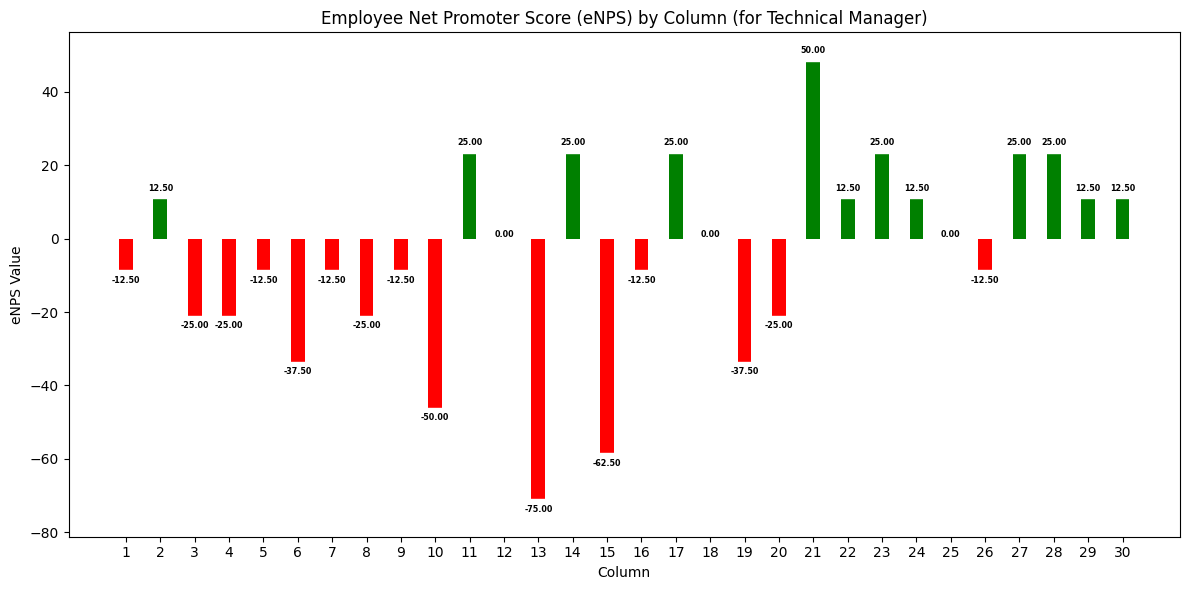

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

eNPS_values = []
column_names = []


for column in df.columns[1:]:

    values = df[column].dropna().astype(int)


    promoters_count = values[values.isin([9, 10])].count()
    neutral_count = values[values.isin([7, 8])].count()
    detractors_count = values[values.isin([0, 1, 2, 3, 4, 5, 6])].count()


    total_responses = len(values)
    eNPS = ((promoters_count - detractors_count) / total_responses) * 100


    eNPS_values.append(eNPS)
    column_names.append(column)


plt.figure(figsize=(12, 6))


x_positions = np.arange(len(column_names)) * 1.5


bars = plt.bar(x_positions, eNPS_values, width=0.6, color=['green' if x > 0 else 'red' if x < 0 else 'blue' for x in eNPS_values])
plt.xlabel('Column')
plt.ylabel('eNPS Value')
plt.title('Employee Net Promoter Score (eNPS) by Column (for Technical Manager)')

# R&D Manager
# Product Manager
# Quality Manager
# HR Manager
# Technical Manager


for bar, eNPS in zip(bars, eNPS_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{eNPS:.2f}', ha='center', va='bottom',
             fontsize=5.8, fontweight='bold', backgroundcolor='white')


plt.xticks(x_positions, column_names)

plt.tight_layout()
plt.show()

=========================================================================================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


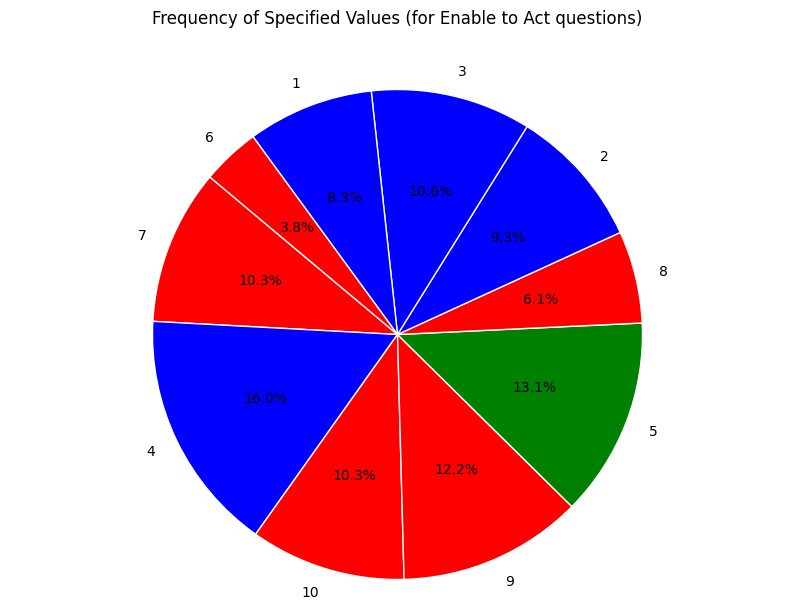

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df_1 = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')


columns = [14, 24, 9, 4, 19, 29]


values = []
for df in [df_1, df_2, df_3, df_4, df_5]:
    for col in columns:
        values.extend(df.iloc[:, col])


value_counts = Counter(values)


labels = value_counts.keys()
sizes = value_counts.values()


colors = []
for label in labels:
    if label > 5:
        colors.append('red')
    elif label < 5:
        colors.append('blue')
    else:
        colors.append('green')


plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.axis('equal')
plt.title('Frequency of Specified Values (for Enable to Act questions)', fontsize=12, pad=30)
plt.show()

=========================================================================================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


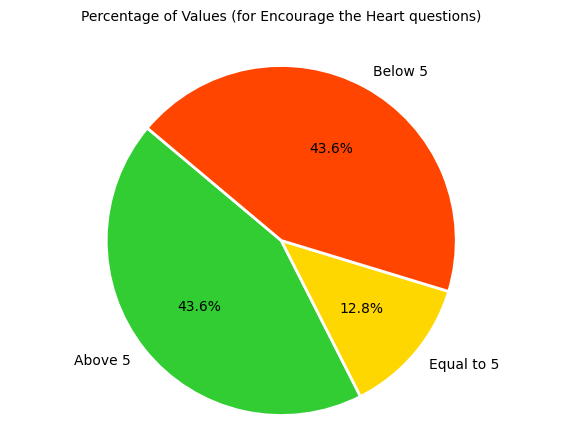

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_1 = pd.read_csv('/content/drive/MyDrive/Parenthesis/RD.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Parenthesis/HR.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Parenthesis/P.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Parenthesis/QC.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Parenthesis/Tech.csv')


columns = [10, 30, 5, 25, 15, 20]

# 1. Model The Way = [1, 11, 6, 21, 26, 16]
# 2. Inspire a Vision = [2, 7, 12, 17, 22, 27]
# 3. Challenge the Process = [3, 23, 8, 28, 13, 18]
# 4. Enable to Act = [14, 24, 9, 4, 19, 29]
# 5. Encourage the Heart = [10, 30, 5, 25, 15, 20]


values = []
for df in [df_1, df_2, df_3, df_4, df_5]:
    for col in columns:
        values.extend(df.iloc[:, col])


above_5 = sum(1 for v in values if v > 5)
equal_5 = sum(1 for v in values if v == 5)
below_5 = sum(1 for v in values if v < 5)


total = above_5 + equal_5 + below_5
above_5_pct = (above_5 / total) * 100
equal_5_pct = (equal_5 / total) * 100
below_5_pct = (below_5 / total) * 100


labels = ['Above 5', 'Equal to 5', 'Below 5']
sizes = [above_5_pct, equal_5_pct, below_5_pct]
colors = ['limegreen', 'gold', 'orangered']


plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.axis('equal')
plt.title('Percentage of Values (for Encourage the Heart questions)', fontsize=10, pad=20)
plt.show()